In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_fva = pd.read_excel('./results/FVA_RBA_bounds_processed.xlsx')
df_fva.index = df_fva.rxn.to_list()

In [3]:
ss_dict = dict()

df_path = pd.read_excel('./input/pathway_regroup.xlsx')

for i in df_path.index:
    p,pgroup = df_path.loc[i, ['Pathway', 'Pathway group']]
    if pd.isnull(p) == False:
        ss_dict[p] = pgroup

In [8]:
pgroups = set(ss_dict.values())
ratios = {pg:[] for pg in pgroups}
for rxn in df_fva.index:
    p = df_fva.subsystem[rxn]
    fvamax = df_fva.fva_max[rxn]
    rbamax = df_fva.rba_max[rxn]
    
    ratios[ss_dict[p]].append(rbamax / fvamax)

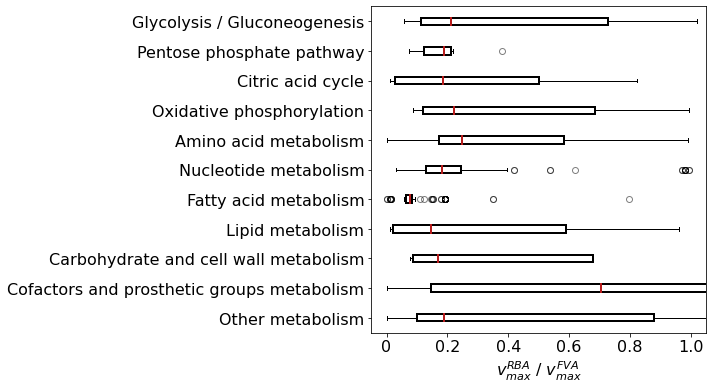

In [15]:
pgroups = ['Glycolysis / Gluconeogenesis', 'Pentose phosphate pathway',
           'Citric acid cycle', 'Oxidative phosphorylation',
           'Amino acid metabolism', 'Nucleotide metabolism',
           'Fatty acid metabolism', 'Lipid metabolism',
           'Carbohydrate and cell wall metabolism',
           'Cofactors and prosthetic groups metabolism',
           'Other metabolism']
pgroups.reverse()

fig,ax = plt.subplots(figsize=(6,6))

# Boxplot settings
w = 0.25
flierprops = {'marker': 'o', 'markersize': 1}
medianprops = dict(linestyle='-', linewidth=2, color='#b71c1c')
boxprops = dict(linestyle='-', linewidth=2, facecolor='w')
whiskerprops = dict(linestyle='-', linewidth=1)
flierprops = dict(marker='o', alpha=0.5)

# Box plot
for i in range(0, len(pgroups)):
    pg = pgroups[i]
    vals = ratios[pg]
    box = ax.boxplot(vals, positions=[i], widths=w,
                     patch_artist=True, boxprops=boxprops,
                     medianprops=medianprops, whiskerprops=whiskerprops,
                     flierprops=flierprops, zorder=10, vert=False);
    
# Axes
ax.set_xlim(-0.05, 1.05)
xticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=16)
ax.set_xlabel('$v_{max}^{RBA}$ / $v_{max}^{FVA}$', fontsize=16)

ax.set_yticks(range(0, len(pgroups)))
ax.set_yticklabels(pgroups, fontsize=16);

plt.savefig('./figures/RBA_FVA_maxflux_ratio.png', transparent=True, bbox_inches='tight')

In [22]:
df = df_fva
ratio_dict = pd.core.series.Series(dtype='float64')
for rxn in df.index:
    ratio_dict[rxn] = df.rba_max[rxn] / df.fva_max[rxn]

In [26]:
ratio_dict

13GS_c         0.679452
16GS_c         0.679454
3DSPHR_r       0.961121
3HACD200_rm    0.070663
3HACD220_rm    0.067495
                 ...   
TKT2_c_REV     0.379267
TKT2_c_FWD     0.201826
TPI_c_REV      0.224868
TPI_c_FWD      1.018488
VALTA_m_REV    0.567475
Length: 805, dtype: float64

In [27]:
ratio_dict[ratio_dict > 0.90]

3DSPHR_r        0.961121
3HAO_c          1.300841
ACALDCD_c       0.923474
ADK1_m          0.993375
ADK3_m          0.993375
                  ...   
PGI_c_FWD       1.018918
PGK_c_FWD       1.015920
PGM_c_FWD       1.015683
PHETA1_c_REV    0.941439
TPI_c_FWD       1.018488
Length: 115, dtype: float64

In [29]:
ratio_dict[ratio_dict > 1.001].shape[0]

59

In [16]:
df_fva

,rxn,name,subsystem,rba_min,rba_max,fva_min,fva_max
13GS_c,13GS_c,"1,3-beta-glucan synthase",Starch and sucrose metabolism,0.278665,0.278665,0.410132,0.410132
16GS_c,16GS_c,"1,6-beta-glucan synthase",Cell wall biosynthesis,0.073333,0.073333,0.107929,0.107929
3DSPHR_r,3DSPHR_r,3-dehydrosphinganine reductase,Sphingolipid biosynthesis,0.001935,0.001935,0.002014,0.002014
3HACD200_rm,3HACD200_rm,B-hydroxyacyl-CoA dehydratase (trans-icos-2-en...,Fatty acid elongation,0.001935,0.274959,0.002014,3.891163
3HACD220_rm,3HACD220_rm,B-hydroxyacyl-CoA dehydratase (trans-docos-2-e...,Fatty acid elongation,0.001935,0.237695,0.002014,3.521647
...,...,...,...,...,...,...,...
TKT2_c_REV,TKT2_c_REV,transketolase 2,Pentose phosphate pathway,0.000000,2.886051,0.000000,7.609554
TKT2_c_FWD,TKT2_c_FWD,transketolase 2,Pentose phosphate pathway,0.000000,4.235345,0.000000,20.985162
TPI_c_REV,TPI_c_REV,triose-phosphate isomerase,Glycolysis / Gluconeogenesis,0.000000,12.617514,0.000000,56.110852
TPI_c_FWD,TPI_c_FWD,triose-phosphate isomerase,Glycolysis / Gluconeogenesis,0.000000,12.265989,0.000000,12.043327


In [15]:
ss_all = sorted(list(set(df_fva.subsystem)))

In [17]:
for i in ss_all:
    print(i)

Acetyl-CoA synthesis
Alanine, aspartate and glutamate metabolism
Alternative carbon metabolism
Amino sugar and nucleotide sugar metabolism
Aminoacyl-tRNA biosynthesis
Arginine and proline metabolism
Biosynthesis of unsaturated fatty acids
Butanoate metabolism
Cell wall biosynthesis
Citric acid cycle
Cofactors and prosthetic groups biosynthesis
Cysteine and methionine metabolism
Detoxification
Ergosterol biosynthesis
Fatty acid biosynthesis
Fatty acid degradation
Fatty acid elongation
Folate metabolism
Fructose and mannose metabolism
Glutathione metabolism
Glycerolipid metabolism
Glycerophospholipid biosynthesis
Glycerophospholipid metabolism
Glycine, serine and threonine metabolism
Glycolysis / Gluconeogenesis
Glyoxylate metabolism
Heme metabolism
Histidine metabolism
Inositol phosphate metabolism
Lipid metabolism
Lysine metabolism
Methylglyoxal metabolism
N-Glycan biosynthesis
Nicotinate and nicotinamide metabolism
Nitrogen metabolism
Nucleotide metabolism
O-Glycan biosynthesis
Oxidat

In [18]:
df_fva[df_fva.subsystem =='Inositol phosphate metabolism']

,rxn,name,subsystem,rba_min,rba_max,fva_min,fva_max
IPK1_n,IPK1_n,"inositol-1,3,4,5,6-pentakisphosphate 2-kinase",Inositol phosphate metabolism,0.0,20.10,0.000000,106.535776
M1PS_c,M1PS_c,myo-inositol-1-phosphate synthase,Inositol phosphate metabolism,0.0,0.82,0.005632,4.510344
MI1PP_c,MI1PP_c,myo-inositol 1-phosphatase,Inositol phosphate metabolism,0.0,0.82,0.005632,4.510344
PAIL3K_vm,PAIL3K_vm,Phosphatidylinositol 3-kinase,Inositol phosphate metabolism,0.0,13.37,0.000000,213.071552
PAIL4K_en,PAIL4K_en,Phosphatidylinositol 4-kinase,Inositol phosphate metabolism,0.0,29.30,0.000000,213.071552
PAIL4K_gm,PAIL4K_gm,Phosphatidylinositol 4-kinase,Inositol phosphate metabolism,0.0,20.36,0.000000,213.071552
PAIL4K_n,PAIL4K_n,Phosphatidylinositol 4-kinase,Inositol phosphate metabolism,0.0,13.04,0.000000,106.535776
PI35P5P_c,PI35P5P_c,"PI-3,5-P phosphatase",Inositol phosphate metabolism,0.0,4.14,0.000000,106.535776
PI35P5P_en,PI35P5P_en,"PI-3,5-P phosphatase",Inositol phosphate metabolism,0.0,3.59,0.000000,106.535776
PI35P5P_vm,PI35P5P_vm,"PI-3,5-P phosphatase",Inositol phosphate metabolism,0.0,4.96,0.000000,213.071552
